In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

torch.__version__

'2.6.0+cu126'

## Data (preparing and loading)
Y = b * X + a,
b = weight,
a = bias

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(Y)

(50, 50)

In [4]:
train_split = int(0.8*len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):
    plt.figure(figsize=(10, 7))

    # Plot training data
    plt.scatter(train_data, train_labels, label='Train Data', color='blue') 
    
    # Plot test data
    plt.scatter(test_data, test_labels, label='Test Data', color='green')

    # Check if predictions is not None
    if predictions is not None:
        plt.scatter(test_data, predictions, label='Predictions', color='red')

    # Show legend
    plt.legend(prop={'size': 14})
    plt.show()

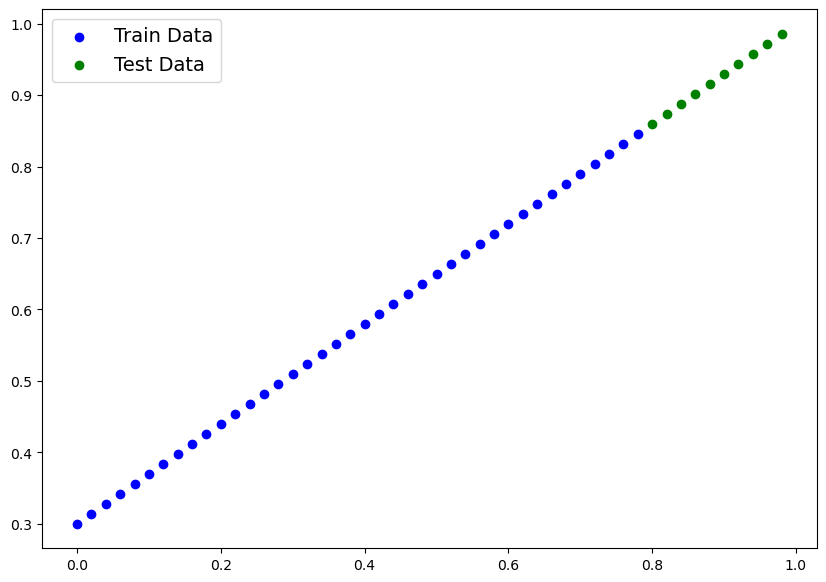

In [6]:
plot_predictions()

In [7]:
# Create Linear Regression Class

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
    # Forward method to define the computation in a model
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias # This is the linear regression formula

In [8]:
torch.randn(1)

tensor([0.7202])

In [9]:
# Create random seed
torch.manual_seed(42)

# Create an instance of the regression model
model_0 = LinearRegressionModel()

# Check the model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weight, bias

(0.7, 0.3)

In [12]:
# Make predictions with model
with torch.inference_mode():
    Y_pred = model_0(X_test)
Y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [13]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

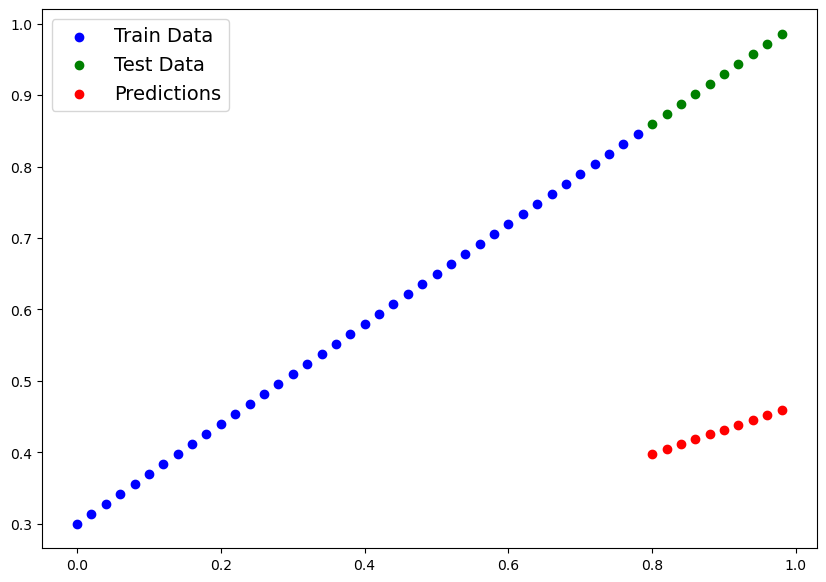

In [14]:
plot_predictions(predictions=Y_pred)

In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)  

In [18]:
with torch.no_grad():
    list(model_0.parameters())

In [19]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [33]:
# Epoch is one loop through the entire dataset (this is a hyperparameter)
epochs = 100
epoch_count = []
loss_values = []
test_loss_values = []

### Training the model
# 0. Loop through the data
for epoch in range(epochs):
    #Set the model to training mode
    model_0.train() # trains mode in pytorch set

    # 1. Forward pass: compute predicted y by passing x to the model.
    Y_pred = model_0(X_train)

    # 2. Compute and print loss.
    loss = loss_fn(Y_pred, Y_train)
    print(f"Loss: {loss}")

    # 3. Optimizer zero gradients
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss wrt params of the model
    loss.backward()

    # 5. Step the optimizer (Perform Gradient Descent)
    optimizer.step() # by default how the optimizer changes will accumulate through the loop

    ### Testing the model
    # Set the model to evaluation mode
    model_0.eval() # evaluation mode in pytorch set 
    with torch.inference_mode():
        # 1. Do the forward pass
        test_predictions = model_0(X_test)
        # 2. Calculate the loss
        test_loss = loss_fn(test_predictions, Y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss) 
        print(f"Epoch: {epoch}, Training Loss: {loss}, Testing Loss: {test_loss}")

        # Print out model state_dict()
        print(model_0.state_dict())

Loss: 0.024458957836031914
Epoch: 0, Training Loss: 0.024458957836031914, Testing Loss: 0.05646304413676262
OrderedDict({'weights': tensor([0.5800]), 'bias': tensor([0.3503])})
Loss: 0.024110013619065285
Loss: 0.02376994863152504
Loss: 0.02342480979859829
Loss: 0.023080935701727867
Loss: 0.022739607840776443
Loss: 0.022391926497220993
Loss: 0.022054409608244896
Loss: 0.02170540764927864
Loss: 0.021366719156503677
Loss: 0.021020207554101944
Epoch: 10, Training Loss: 0.021020207554101944, Testing Loss: 0.04819049686193466
OrderedDict({'weights': tensor([0.5972]), 'bias': tensor([0.3433])})
Loss: 0.020677709951996803
Loss: 0.02033500373363495
Loss: 0.01998869702219963
Loss: 0.019649803638458252
Loss: 0.019300809130072594
Loss: 0.018963487818837166
Loss: 0.01861560344696045
Loss: 0.018274478614330292
Loss: 0.017930403351783752
Loss: 0.01758546568453312
Epoch: 20, Training Loss: 0.01758546568453312, Testing Loss: 0.04060482233762741
OrderedDict({'weights': tensor([0.6141]), 'bias': tensor([

In [21]:
with torch.inference_mode():
    Y_pred_new = model_0(X_test)

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [23]:
(weight, bias)

(0.7, 0.3)

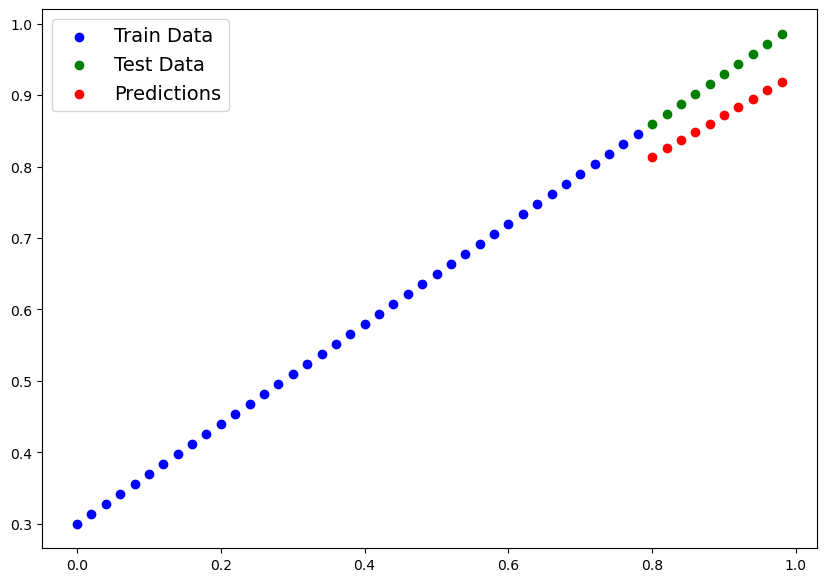

In [24]:
plot_predictions(predictions=Y_pred_new)

## Saving a model in PyTorch

There are 3 main methods to save and load in torch
1. `torch.save` - allows you to save a pytorch object in pickle format
2. `torch.load()` - allows you to load a saved pytorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [25]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [35]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(exist_ok=True, parents=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_wf_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

Saving model to models\01_pytorch_wf_model.pth


In [36]:
model_0

LinearRegressionModel()

## Loading a Pytorch model

Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [37]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [38]:
# To load in a saved state_dict we have to instantiate a new instance of our model class

loaded_model_0 = LinearRegressionModel()

#Load the saved state_dict() of model_0 (this will be the new instance with updated params)
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [39]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [40]:
# Make some preds with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_pred = loaded_model_0(X_test)

loaded_model_pred

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [44]:
# Compare loaded model preds with original model preds
model_0.eval()
with torch.inference_mode():
    model_0_pred = model_0(X_test)
model_0_pred

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])